In [1]:
# import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef, confusion_matrix

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
# Determine number of fraud cases in dataset
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlier_Fraction = len(fraud)/float(len(valid))
print('Outlier Fraction: ',outlier_Fraction)
print('Fraud Transactions: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

Outlier Fraction:  0.0017304750013189597
Fraud Transactions: 492
Valid Transactions: 284315


In [4]:
print('Amount details of the fraudulent transaction',fraud.Amount.describe())

Amount details of the fraudulent transaction count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [5]:
print('details of valid transaction',valid.Amount.describe())

details of valid transaction count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [6]:
# dividing the X and the Y from the dataset
X = df.drop(['Class'], axis = 1)
Y = df["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(284807, 30)
(284807,)


In [7]:
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 30)

# Building a Random Forest Model using skicit learn
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)

In [8]:
# Building all kinds of evaluating parameters
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9994908886626171
The precision is 0.946236559139785
The recall is 0.7857142857142857
The F1-Score is 0.8585365853658538
The Matthews correlation coefficient is0.862007429170268


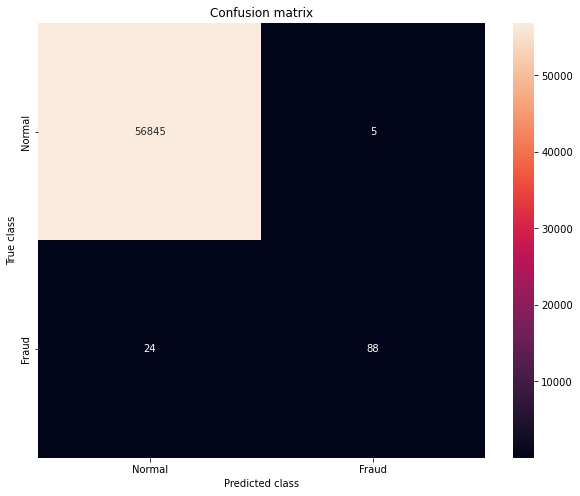

In [9]:
# Visualizing the Confusion Matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(10, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show();